In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from PIL import Image

In [2]:
faces = fetch_lfw_people()

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
random_index = np.random.permutation(len(faces.data))
X = faces.data[random_index]

In [5]:
example_data = X[:36]
example_data.shape

(36, 2914)

In [6]:
# 显示函数
def plot_digits(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), subplot_kw={"xticks":[], "yticks":[]}, gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,47), cmap = "bone")
    plt.show()

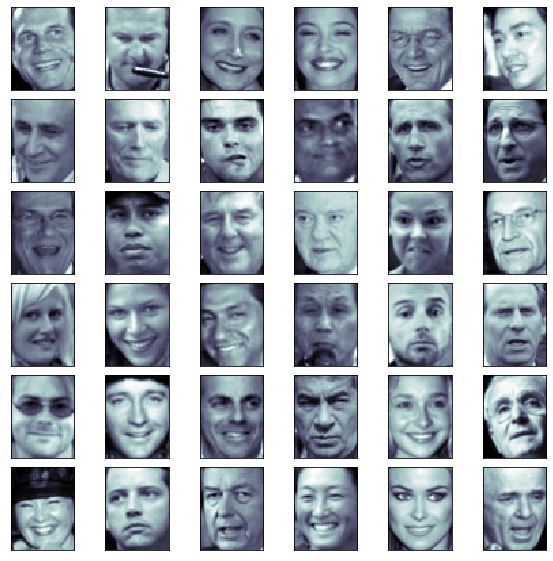

In [7]:
plot_digits(example_data)

# 特征脸

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(svd_solver="randomized")
%time pca.fit(X)

Wall time: 19.9 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [10]:
pca.components_.shape

(2914, 2914)

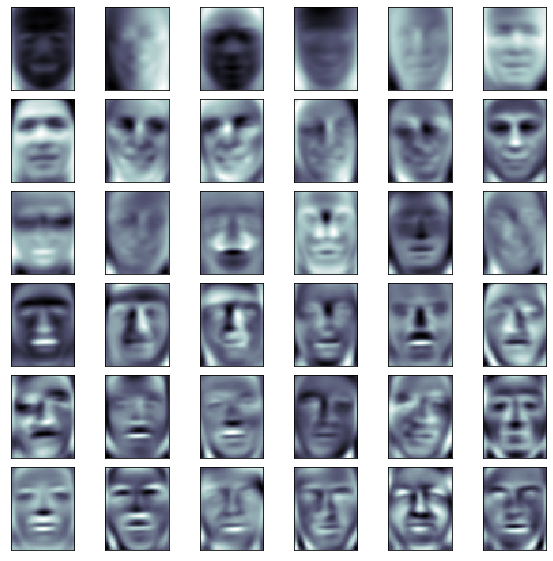

In [11]:
# 特征脸展示
plot_digits(pca.components_[:36])

In [12]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [13]:
faces2.data.shape

(1348, 2914)

In [14]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

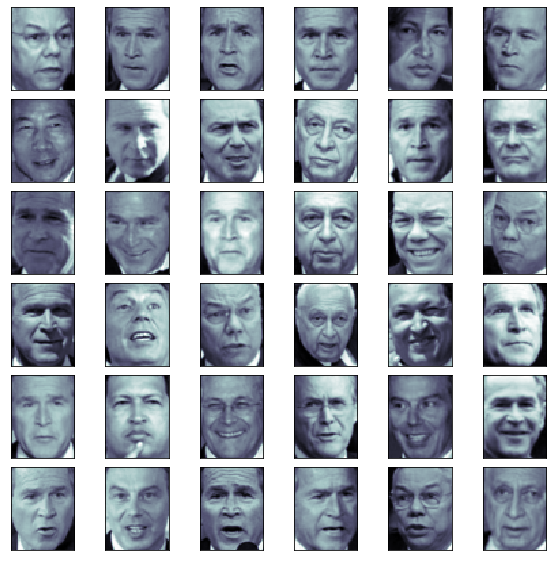

In [15]:
plot_digits(faces2.data[:36])

In [16]:
faces2.target[:36]

array([1, 3, 3, 3, 5, 3, 6, 3, 7, 0, 3, 2, 3, 3, 3, 0, 1, 1, 3, 7, 1, 0,
       5, 3, 3, 5, 2, 2, 7, 3, 3, 7, 3, 3, 1, 0], dtype=int64)